<a href="https://colab.research.google.com/github/kujoki/Time_series_ml/blob/main/time_series_and_anomal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
!pip install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.0 MB/s 
     |████████████████████████████████| 1.4 MB 52.8 MB/s 
     |████████████████████████████████| 1.2 MB 45.2 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367719 sha256=237b834f0e6618e02fd7d6d7126fc65376d3f1947f08ced52ecf9760fbfec2d0
  Stored in directory: /root/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [2]:
# Including parent path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta as td

from sklearn.model_selection import train_test_split

import unittest
import numpy as np
import pandas as pd

#from preprocessing.test_common import make_labels, make_series
#from preprocessing.helper import TimeseriesHelper
#from preprocessing.preprocessing import TimeSeriesPreprocessor
#from preprocessing.feature_engineering import TimeSeriesFeatureEngineering
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
warnings.filterwarnings('ignore')



In [4]:
%matplotlib inline

import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [30]:
data = pd.read_csv('/content/sample_data/data_colab.csv')

In [31]:
data.head()

,N,DIST,Xu,Yu,Zu,Xd,Yd,Zd,Vu,Vd,LAT,LNG,Time,Depth,Mark,Comment,label,ValueDate
0,0,0.8,-21.7,-3.5,-50.2,-19.1,-4.8,-51.2,54.8,54.8,47.73392,54.2152,13:10:32,0,0,NaN,0,2022-07-01 13:10:32
1,1,0.8,-21.7,-3.4,-50.3,-19.1,-4.7,-51.2,54.8,54.8,47.73392,54.2152,13:10:32,0,0,NaN,0,2022-07-01 13:10:32
2,2,0.8,-21.6,-3.4,-50.3,-19.1,-4.7,-51.2,54.8,54.8,47.73392,54.2152,13:10:32,0,0,NaN,0,2022-07-01 13:10:32
3,3,0.8,-21.6,-3.4,-50.3,-19.1,-4.7,-51.2,54.8,54.8,47.73392,54.2152,13:10:32,0,0,NaN,0,2022-07-01 13:10:32
4,4,0.8,-21.6,-3.3,-50.3,-19.1,-4.6,-51.2,54.8,54.8,47.73392,54.2152,13:10:32,0,0,NaN,0,2022-07-01 13:10:32


In [13]:
df = data.drop(columns=['N', 'DIST','LAT', 'LNG', 'Time', 	'Depth', 	'Mark',	'Comment', 	'label', 	'ValueDate'])

In [18]:
df

,0,1,2,3,5,6,7,8
0,-21.7,-3.5,-50.2,-19.1,-4.8,-51.2,54.8,54.8
1,-21.7,-3.4,-50.3,-19.1,-4.7,-51.2,54.8,54.8
2,-21.6,-3.4,-50.3,-19.1,-4.7,-51.2,54.8,54.8
3,-21.6,-3.4,-50.3,-19.1,-4.7,-51.2,54.8,54.8
4,-21.6,-3.3,-50.3,-19.1,-4.6,-51.2,54.8,54.8
...,...,...,...,...,...,...,...,...
45916,-14.0,19.3,-46.4,-11.0,18.2,-46.0,52.2,50.7
45917,-13.9,19.3,-46.4,-11.0,18.2,-46.0,52.2,50.7
45918,-13.9,19.4,-46.4,-11.0,18.2,-46.0,52.2,50.6
45919,-13.9,19.4,-46.4,-11.0,18.3,-46.0,52.2,50.7


In [17]:
df.columns = ['0', '1', '2', '3', '5', '6', '7', '8']

In [21]:
df = df.stack()
df.index.rename([ 'id', 'time' ], inplace = True )
df = df.reset_index()

In [23]:
df

,id,time,0
0,0,0,-21.7
1,0,1,-3.5
2,0,2,-50.2
3,0,3,-19.1
4,0,5,-4.8
...,...,...,...
367363,45920,3,-11.0
367364,45920,5,18.3
367365,45920,6,-46.0
367366,45920,7,52.2


In [24]:
f = extract_features(df, column_id = "id", column_sort = "time" )

Feature Extraction: 100%|██████████| 45921/45921 [38:57<00:00, 19.65it/s]


In [25]:
f.head()

,0__variance_larger_than_standard_deviation,0__has_duplicate_max,0__has_duplicate_min,0__has_duplicate,0__sum_values,0__abs_energy,0__mean_abs_change,0__mean_change,0__mean_second_derivative_central,0__median,...,0__permutation_entropy__dimension_6__tau_1,0__permutation_entropy__dimension_7__tau_1,0__query_similarity_count__query_None__threshold_0.0,"0__matrix_profile__feature_""min""__threshold_0.98","0__matrix_profile__feature_""max""__threshold_0.98","0__matrix_profile__feature_""mean""__threshold_0.98","0__matrix_profile__feature_""median""__threshold_0.98","0__matrix_profile__feature_""25""__threshold_0.98","0__matrix_profile__feature_""75""__threshold_0.98",0__mean_n_absolute_max__number_of_maxima_7
0,1.0,1.0,0.0,1.0,-40.9,12018.55,37.528571,10.928571,-1.516667,-11.95,...,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.657143
1,1.0,1.0,0.0,1.0,-40.8,12026.96,37.614286,10.928571,-1.525000,-11.90,...,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.657143
2,1.0,1.0,0.0,1.0,-40.7,12022.63,37.600000,10.914286,-1.516667,-11.90,...,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.642857
3,1.0,1.0,0.0,1.0,-40.7,12022.63,37.600000,10.914286,-1.516667,-11.90,...,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.642857
4,1.0,1.0,0.0,1.0,-40.5,12021.03,37.657143,10.914286,-1.525000,-11.85,...,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.628571


In [28]:
f.to_csv('features.csv', index = False)

In [29]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [39]:
y = pd.DataFrame(data['label'])

In [49]:
y = data['label']

In [47]:
y['id'] = data['N']

In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45916    0
45917    0
45918    0
45919    0
45920    0
Name: label, Length: 45921, dtype: int64

In [51]:
impute(f)
features_filtered = select_features(f, y)

In [53]:
X_full_train, X_full_test, y_train, y_test = train_test_split(f, y, test_size=.4)
X_filtered_train, X_filtered_test = X_full_train[features_filtered.columns], X_full_test[features_filtered.columns]

In [54]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_full_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_full_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17485
           1       0.56      0.60      0.58       884

    accuracy                           0.96     18369
   macro avg       0.77      0.79      0.78     18369
weighted avg       0.96      0.96      0.96     18369



In [55]:


classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))



              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17485
           1       0.45      0.51      0.48       884

    accuracy                           0.95     18369
   macro avg       0.71      0.74      0.73     18369
weighted avg       0.95      0.95      0.95     18369



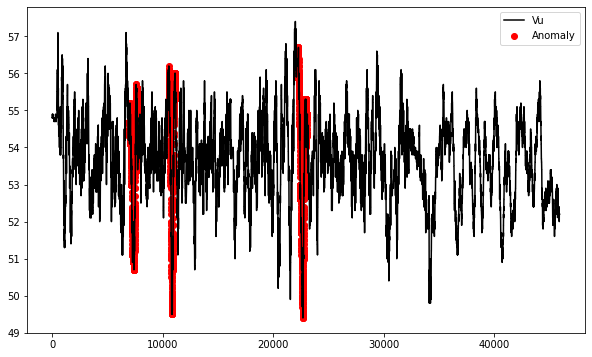

In [56]:
fig, ax = plt.subplots(figsize=(10,6))

a = data.loc[data['label'] == 1, ['Vu']] #anomaly

ax.plot(data.index, data['Vu'], color='black', label = 'Vu')
ax.scatter(a.index,a['Vu'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

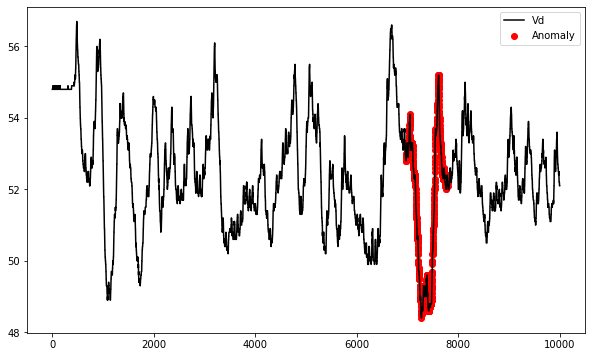

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
df = data.iloc[0:10000]
df

a = df.loc[df['label'] == 1, ['Vd']] #anomaly

ax.plot(df.index, df['Vd'], color='black', label = 'Vd')
ax.scatter(a.index,a['Vd'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

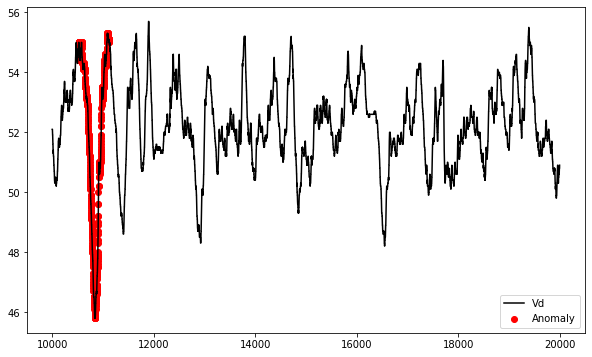

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
df = data.iloc[10000:20000]
df

a = df.loc[df['label'] == 1, ['Vd']] #anomaly

ax.plot(df.index, df['Vd'], color='black', label = 'Vd')
ax.scatter(a.index,a['Vd'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

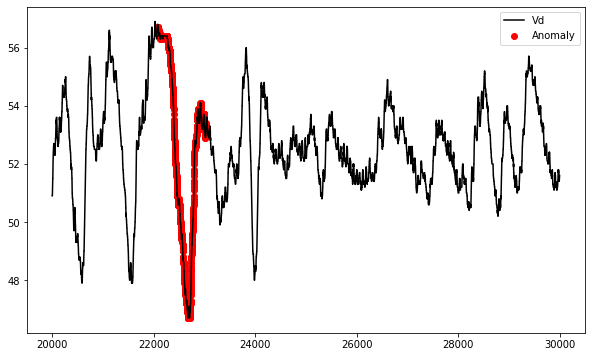

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
df = data.iloc[20000:30000]
df

a = df.loc[df['label'] == 1, ['Vd']] #anomaly

ax.plot(df.index, df['Vd'], color='black', label = 'Vd')
ax.scatter(a.index,a['Vd'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

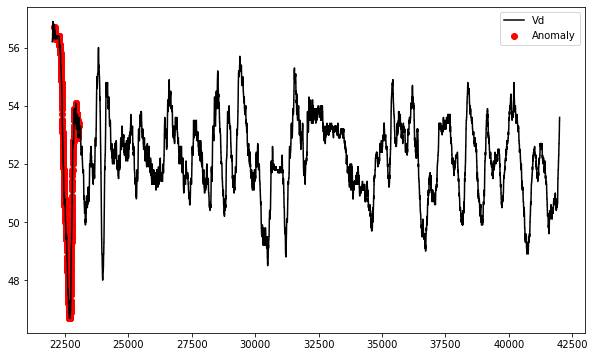

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
df = data.iloc[22000:42000]
df

a = df.loc[df['label'] == 1, ['Vd']] #anomaly

ax.plot(df.index, df['Vd'], color='black', label = 'Vd')
ax.scatter(a.index,a['Vd'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

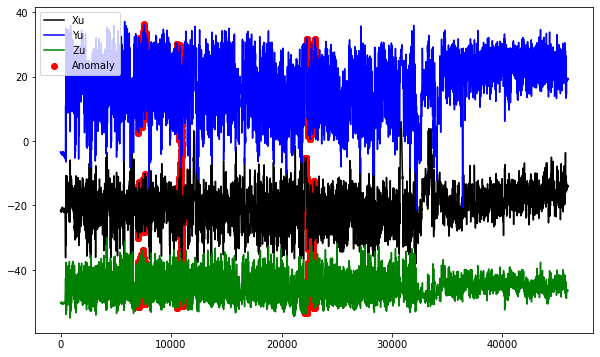

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

x_a = data.loc[data['label'] == 1, ['Xu']] #anomaly
y_a = data.loc[data['label'] == 1, ['Yu']] #anomaly
z_a = data.loc[data['label'] == 1, ['Zu']] #anomaly

ax.plot(data.index, data['Xu'], color='black', label = 'Xu')
ax.plot(data.index, data['Yu'], color='blue', label = 'Yu')
ax.plot(data.index, data['Zu'], color='green', label = 'Zu')
ax.scatter(x_a.index,x_a['Xu'], color='red', label = 'Anomaly')
ax.scatter(y_a.index,y_a['Yu'], color='red')
ax.scatter(z_a.index,z_a['Zu'], color='red')
plt.legend()
plt.show()

In [ ]:
extraction_settings = ComprehensiveFCParameters()

X = extract_features(df, column_id='N', column_sort='ValueDate',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)


Feature Extraction:  57%|█████▋    | 78870/137763 [37:21<30:06, 32.61it/s]

In [8]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.2 MB/s 
     |████████████████████████████████| 837 kB 38.9 MB/s 
     |████████████████████████████████| 136 kB 62.9 MB/s 
     |████████████████████████████████| 1.1 MB 47.5 MB/s 
     |████████████████████████████████| 9.8 MB 40.0 MB/s 
     |████████████████████████████████| 140 kB 59.5 MB/s 
     |████████████████████████████████| 830 kB 46.0 MB/s 
     |████████████████████████████████| 822 kB 49.2 MB/s 
     |████████████████████████████████| 802 kB 59.9 MB/s 
     |████████████████████████████████| 802 kB 58.1 MB/s 
     |████████████████████████████████| 793 kB 53.3 MB/s 
     |████████████████████████████████| 793 kB 53.4 MB/s 
     |████████████████████████████████| 791 kB 56.9 MB/s 
     |████████████████████████████████| 786 kB 56.1 MB/s 
     |████████████████████████████████| 779 kB 43.7 MB/s 
     |███████████████████████████